### Analysis of mortality

In [1]:
import warnings
warnings.filterwarnings('ignore')

- Load modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Read dataset and prepare for statistical analysis

In [11]:
df_data_per_reply = pd.read_excel("../raw_data/mortality_data.xlsx", sheet_name="mortality_per_reply")
df_data_per_reply.head(5)

,Treatment,Time,Reply,Dead
0,52,1,1,5
1,52,1,2,5
2,52,1,3,4
3,49,1,1,1
4,52,2,1,5


In [3]:
df_data = pd.read_excel("../raw_data/mortality_data.xlsx", sheet_name="cumulative_mortality")
df_data.head(5)

,Days,control (34g/L),36g/L,42g/L,49g/L,52g/L
0,0,0.0,0.0000,0.0000,0.0000,0.0000
1,1,0.0,0.0000,0.0000,3.3333,46.6667
2,2,0.0,3.3333,0.0000,10.0000,100.0000
3,3,0.0,3.3333,0.0000,13.3333,100.0000
4,4,0.0,3.3333,3.3333,13.3333,100.0000


In [4]:
df_data.columns = ["Days", "Control (34.0 g/L)", "36.4 g/L",	"45.8 g/L", "51.8 g/L", "57.7 g/L"]

In [5]:
df_data.describe()

,Days,Control (34.0 g/L),36.4 g/L,45.8 g/L,51.8 g/L,57.7 g/L
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,14.000000,1.954003,3.103417,6.436772,41.839062,94.712645
std,8.514693,1.670750,0.859594,3.977229,25.751955,20.731027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,3.333300,3.333300,23.333300,100.000000
50%,14.000000,3.333300,3.333300,10.000000,33.333300,100.000000
75%,21.000000,3.333300,3.333300,10.000000,73.333300,100.000000
max,28.000000,3.333300,3.333300,10.000000,73.333300,100.000000


- Prepare data for plots

In [6]:
list_df_data = []

for column in ["Control (34.0 g/L)", "36.4 g/L", "45.8 g/L", "51.8 g/L", "57.7 g/L"]:
    df_filter = df_data[["Days", column]]
    df_filter.columns = ["Days", "Cumulative mortaility (%)"]
    df_filter["Dilutions of Brine"] = column
    list_df_data.append(df_filter)

df_processed = pd.concat(list_df_data, axis=0)
df_processed.reset_index(inplace=True)
df_processed

,index,Days,Cumulative mortaility (%),Dilutions of Brine
0,0,0,0.0,Control (34.0 g/L)
1,1,1,0.0,Control (34.0 g/L)
2,2,2,0.0,Control (34.0 g/L)
3,3,3,0.0,Control (34.0 g/L)
4,4,4,0.0,Control (34.0 g/L)
...,...,...,...,...
140,24,24,100.0,57.7 g/L
141,25,25,100.0,57.7 g/L
142,26,26,100.0,57.7 g/L
143,27,27,100.0,57.7 g/L


In [10]:
df_processed.to_csv("tmp.csv", index=False)

In [7]:
personalized_pallete = ["#bee9e8", "#62b6cb", "#1b4965", 
                  "#cae9ff", "#5fa8d3"]

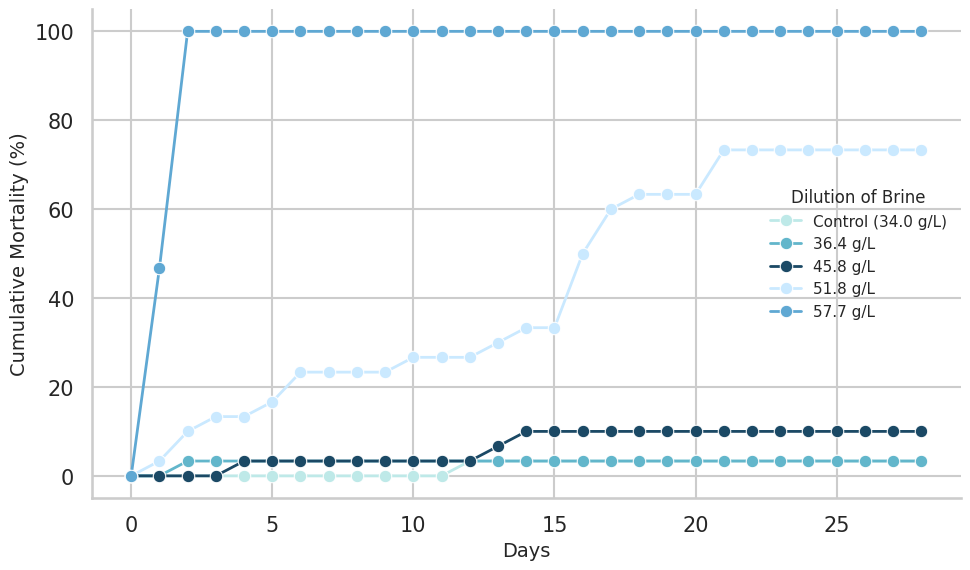

In [9]:
sns.set(style="whitegrid", context="talk", font_scale=0.91)

plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=df_processed, 
    x="Days", 
    y="Cumulative mortaility (%)", 
    hue="Dilutions of Brine",
    marker="o",
    linewidth=2,
    palette=personalized_pallete,
    err_style="bars", 
    errorbar=("se", 6),
)

ax.set_xlabel("Days", fontsize=14)
ax.set_ylabel("Cumulative Mortality (%)", fontsize=14)
ax.legend(title="Dilution of Brine", title_fontsize=12, fontsize=11, loc='best', frameon=False)

sns.despine()

plt.tight_layout()
plt.savefig("../figures_paper/mortality_analysis.png", dpi=300)
plt.show()